# FIAP - DATA MINING & PRESCRIPTIVE ANALYSIS

Turma 87BI - 2023

Trabalho Final


# Enunciado
A partir de uma crescente taxa de turnover a empresa ACME solicita a sua área de cientistas que indique através de modelos adequados quais os colaboradores ela deve fazer sua ação de retenção. Foi disponibilizada uma base de seus colaboradores para análise.

# Questão 1

Utilize a base se dados HR_Abandono2022.

**a)Qual o objetivo desse estudo**

Identificar as características que levavam os colaboradores a sair da empresa (representado por “1” (True) na coluna “left”

**b)Porque nesse estudo é indicado utilizar técnicas supervisionadas de Classificação**
Porque temos uma coluna target conhecida, e essa coluna é uma classificação binária (1 ou 0) e não um valor quantitativo para regressão linear.   

**c)Classifique as variáveis: dependentes e independentes(preditoras)**

| Variável              | Tipo         |
|-----------------------|--------------|
| left                  | dependente   |
| satisfaction_level    | independente |
| last_evaluation       | independente |
| average_montly_hours  | independente |
| time_spend_company    | independente |
| Work_accident         | independente |
| promotion_last_5years | independente |
| salary                | independente |
| num_project           | independente |
| depto                 | independente

# Questão 2
Faça uma análise descritiva de todas as variáveis com a variável ‘target” separada em dois blocos:

## a) Variáveis preditoras numéricas/quantitativas

### Preparando o Dataset

In [86]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [87]:
df = pd.read_csv('HR_Abandono_2022(1).csv', delimiter=';')
df.head()

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,num_project,depto
0,1,1,"0,38","0,53",157,3,0,0,low,2,sales
1,2,1,"0,8","0,86",262,6,0,0,medium,5,sales
2,3,1,"0,11","0,88",272,4,0,0,medium,6,sales
3,4,1,"0,72","0,87",223,5,0,0,low,5,sales
4,5,1,"0,37","0,52",159,3,0,0,low,2,sales


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     15000 non-null  int64 
 1   left                   15000 non-null  int64 
 2   satisfaction_level     15000 non-null  object
 3   last_evaluation        15000 non-null  object
 4   average_montly_hours   15000 non-null  int64 
 5   time_spend_company     15000 non-null  int64 
 6   Work_accident          15000 non-null  int64 
 7   promotion_last_5years  15000 non-null  int64 
 8   salary                 15000 non-null  object
 9   num_project            15000 non-null  int64 
 10  depto                  15000 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [89]:
df.describe()

,id,left,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,0.238533,201.187400,3.407067,0.144600,0.021800,3.785867
std,4330.271354,0.426201,50.887422,1.176091,0.351709,0.146035,1.194589
min,1.000000,0.000000,96.000000,2.000000,0.000000,0.000000,2.000000
25%,3750.750000,0.000000,156.000000,3.000000,0.000000,0.000000,3.000000
50%,7500.500000,0.000000,200.000000,3.000000,0.000000,0.000000,4.000000
75%,11250.250000,0.000000,245.000000,4.000000,0.000000,0.000000,5.000000
max,15000.000000,1.000000,808.000000,6.000000,1.000000,1.000000,6.000000


Precisamos transformar a coluna 'satisfaction level" e "last evaluation" em float

In [90]:
##substituir vírgula por ponto
df['satisfaction_level']=df['satisfaction_level'].str.replace(',','.')
df['last_evaluation']=df['last_evaluation'].str.replace(',','.')

## transformando em float

df[['satisfaction_level','last_evaluation']]=df[['satisfaction_level','last_evaluation']].astype(float)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15000 non-null  int64  
 1   left                   15000 non-null  int64  
 2   satisfaction_level     15000 non-null  float64
 3   last_evaluation        15000 non-null  float64
 4   average_montly_hours   15000 non-null  int64  
 5   time_spend_company     15000 non-null  int64  
 6   Work_accident          15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   salary                 15000 non-null  object 
 9   num_project            15000 non-null  int64  
 10  depto                  15000 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [92]:
df.describe()

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,0.238533,0.616725,0.716089,201.187400,3.407067,0.144600,0.021800,3.785867
std,4330.271354,0.426201,0.243012,0.171170,50.887422,1.176091,0.351709,0.146035,1.194589
min,1.000000,0.000000,0.100000,0.360000,96.000000,2.000000,0.000000,0.000000,2.000000
25%,3750.750000,0.000000,0.440000,0.560000,156.000000,3.000000,0.000000,0.000000,3.000000
50%,7500.500000,0.000000,0.640000,0.720000,200.000000,3.000000,0.000000,0.000000,4.000000
75%,11250.250000,0.000000,0.820000,0.870000,245.000000,4.000000,0.000000,0.000000,5.000000
max,15000.000000,1.000000,1.000000,1.000000,808.000000,6.000000,1.000000,1.000000,6.000000


### Variáveis Preditoras numéricas

In [93]:
df_num = df[
    ['left','satisfaction_level', 
    'last_evaluation', 'average_montly_hours', 'time_spend_company','num_project']
    ]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   left                  15000 non-null  int64  
 1   satisfaction_level    15000 non-null  float64
 2   last_evaluation       15000 non-null  float64
 3   average_montly_hours  15000 non-null  int64  
 4   time_spend_company    15000 non-null  int64  
 5   num_project           15000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 703.3 KB


In [94]:
df_num.head()

,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,num_project
0,1,0.38,0.53,157,3,2
1,1,0.80,0.86,262,6,5
2,1,0.11,0.88,272,4,6
3,1,0.72,0.87,223,5,5
4,1,0.37,0.52,159,3,2


#### Satisfaction_level

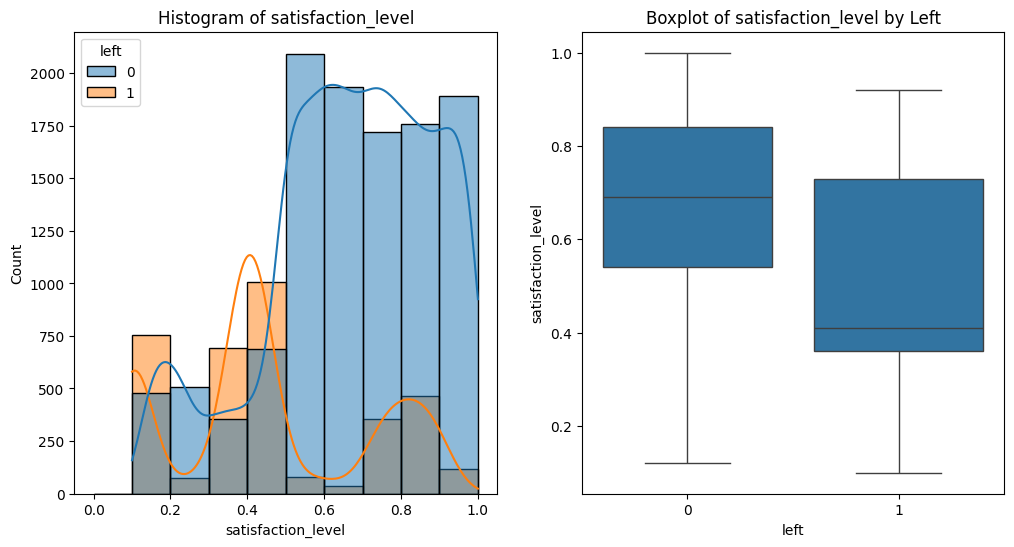

In [95]:
## primeiro vamos avaliar a distribuição e relação entre satisfaction level e "Left"
parameter = 'satisfaction_level'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', kde = True, binwidth = 0.1, binrange = [0,1])
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

In [96]:
## Claramente vemos uma forte correlação entre o nível de satisfação do funcionário e se ele saiu ou não 
##(distribuição e mediana do grupo "left" é extremamente inferior

#### Last_evaluation

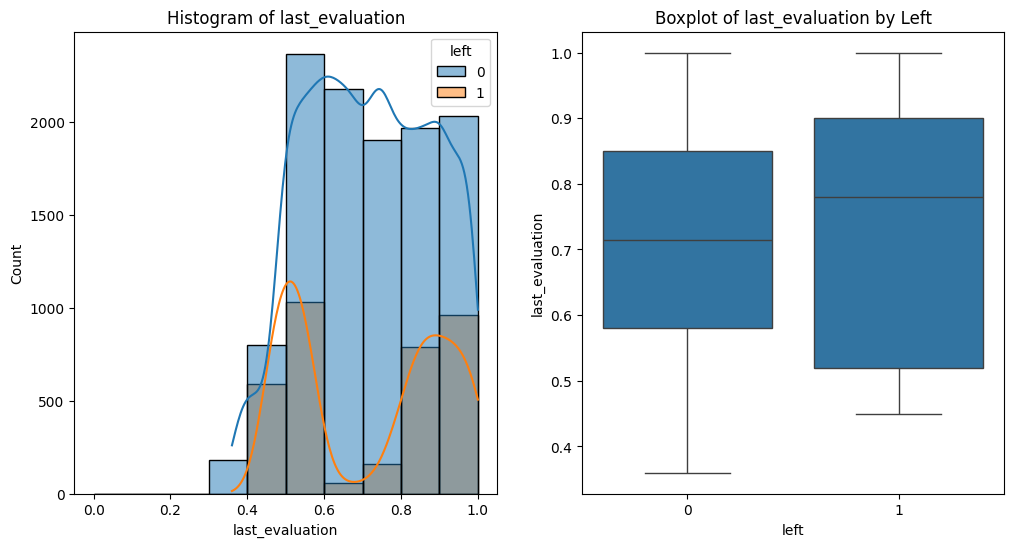

In [97]:
## agpra vamos avaliar a distribuição e relação entre last_evaluation e "Left"
parameter = 'last_evaluation'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', kde = True, binwidth=0.1, binrange = [0,1])
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

In [98]:
''' 
esse é um caso interessante. Apesar de das medias e medianas não estarem muito diferentes, 
a distribuição do parâmetro daqueles que saíram está muito concentrada em notas abaixo de 0.6 ou acima de 0.8
Indicando que funcionários "mediano" não tem interesse de sair da empresa. Enquanto os de baixa performance ou altíssima performance
Podem se interessar mais por asir
'''

' \nesse é um caso interessante. Apesar de das medias e medianas não estarem muito diferentes, \na distribuição do parâmetro daqueles que saíram está muito concentrada em notas abaixo de 0.6 ou acima de 0.8\nIndicando que funcionários "mediano" não tem interesse de sair da empresa. Enquanto os de baixa performance ou altíssima performance\nPodem se interessar mais por asir\n'

#### average_montly_hours

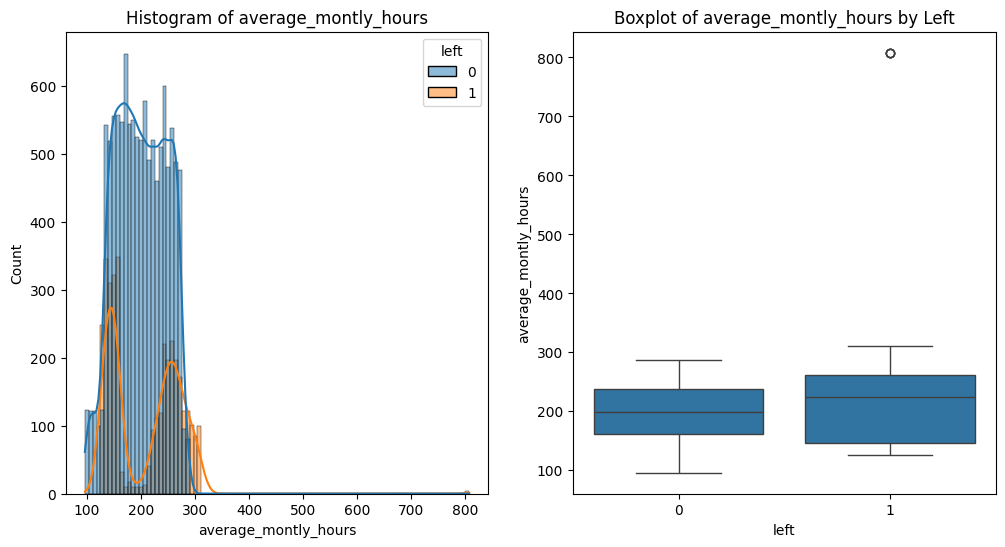

In [99]:
## agpra vamos avaliar a distribuição e relação entre average_montly_hours e "Left"
parameter = 'average_montly_hours'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', kde = True)
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

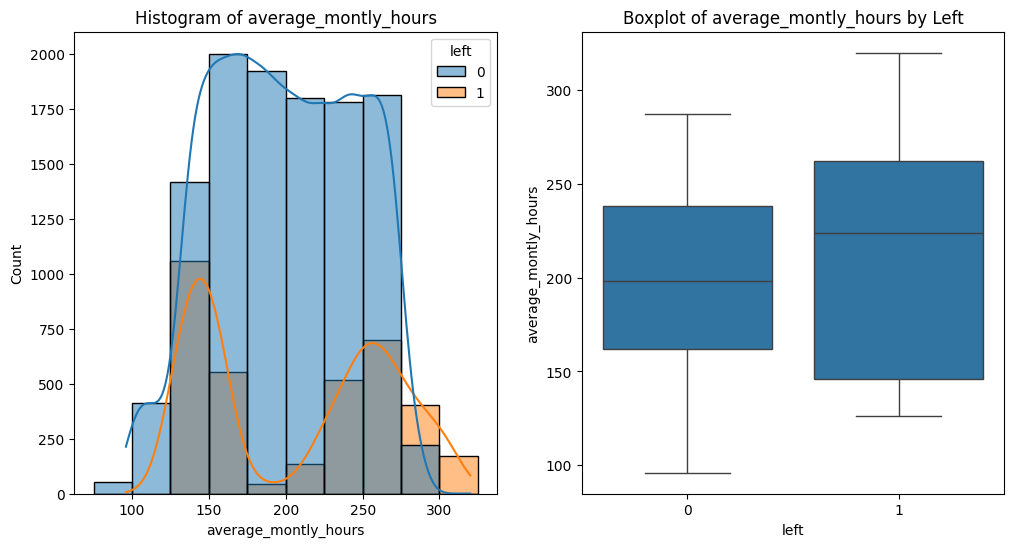

In [109]:
##Temos um outlier nesta distribuição. Vamos truncar o valor em 320 que é próximo do máximo natural da distribuição

df_num.loc[df_num['average_montly_hours']>=320, 'average_montly_hours'] = 320


## agora repetimos nosso plot para avaliação 
parameter = 'average_montly_hours'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', kde = True, binwidth = 25, binrange = [75,325])
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

In [116]:
##Similar ao caso anterior, vemos qu temos pouca saída dos funcionários no "centro" da distribuçião.
##Apesar disso a média das horas mensais é maior nos que decidiram sair

#### Time_spend_company

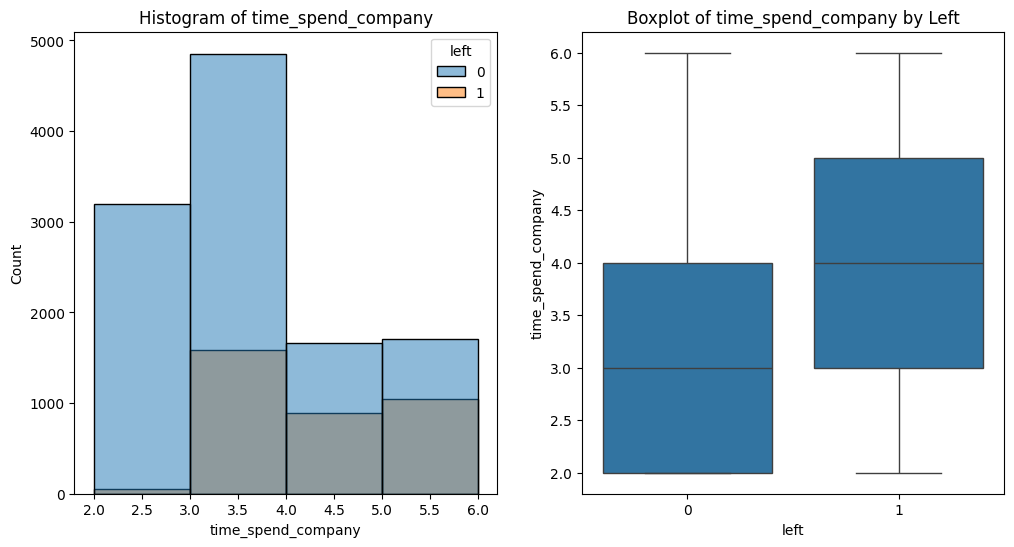

In [113]:
## agpra vamos avaliar a distribuição e relação entre time_spend_company e "Left"
parameter = 'time_spend_company'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', binwidth=1)
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

In [115]:
#Forte correlação. Funcionários tendem a começar a sair após seus 3 anos de empresa

#### num_project

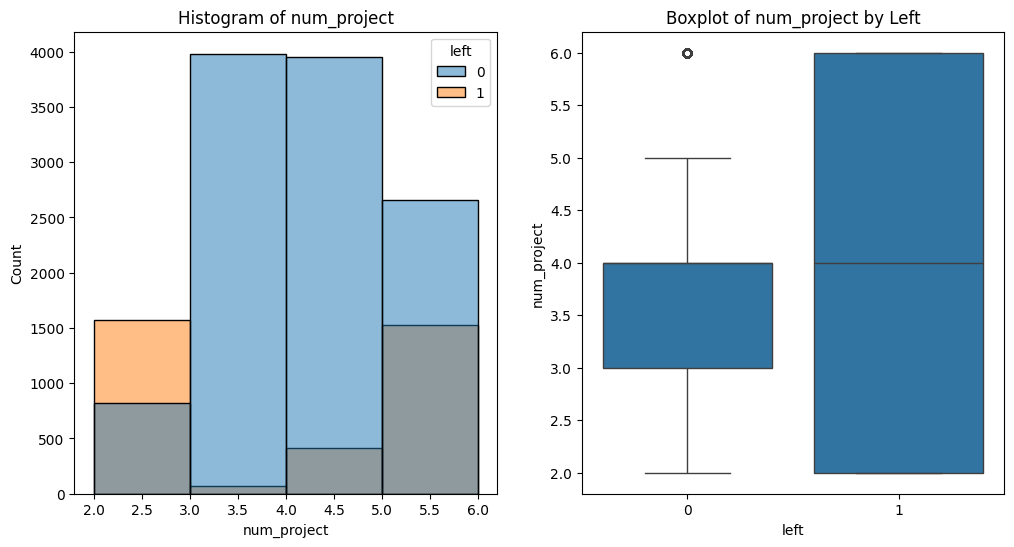

In [120]:
## agpra vamos avaliar a distribuição e relação entre num_project e "Left"
parameter = 'num_project'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', binwidth=1)
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

In [121]:
##Novamente uma concentração dos que ficam no centro, e uma concentração dos que saem nas extremidades
##Pode significar que funcionários com menos de 3 projetos não se sentem desafiados o sfuciente
##Enquanto funcionarios com mais de 5 projetos podem se sentir sobrecarregados e tendem a sair

### Variáveis Preditoras Categóricas

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15000 non-null  int64  
 1   left                   15000 non-null  int64  
 2   satisfaction_level     15000 non-null  float64
 3   last_evaluation        15000 non-null  float64
 4   average_montly_hours   15000 non-null  int64  
 5   time_spend_company     15000 non-null  int64  
 6   Work_accident          15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   salary                 15000 non-null  object 
 9   num_project            15000 non-null  int64  
 10  depto                  15000 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [125]:
df_cat = df[
    ['left','Work_accident', 
    'promotion_last_5years', 'salary', 'depto']
    ]
df_cat.head()

,left,Work_accident,promotion_last_5years,salary,depto
0,1,0,0,low,sales
1,1,0,0,medium,sales
2,1,0,0,medium,sales
3,1,0,0,low,sales
4,1,0,0,low,sales


<Axes: xlabel='left'>

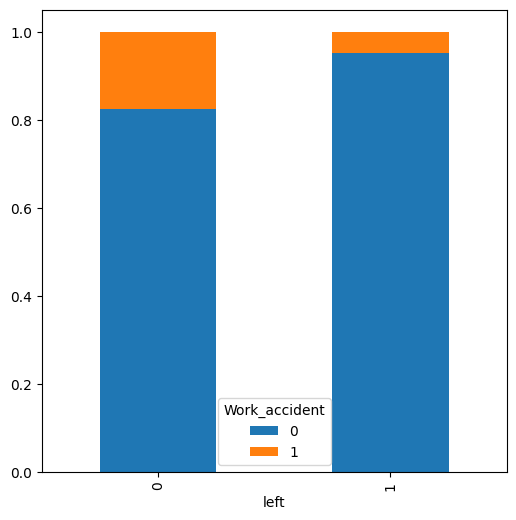

In [126]:

Evaluation_cat = pd.crosstab(df_cat['left'],df_cat['Work_accident'])
Evaluation_cat.div(Evaluation_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

Claramente vemos uma forte correlação nesses valores. A distribuição de satisfação dos que saíram (left = 1) é decididamente menor que a distribuição dos que não saíram.

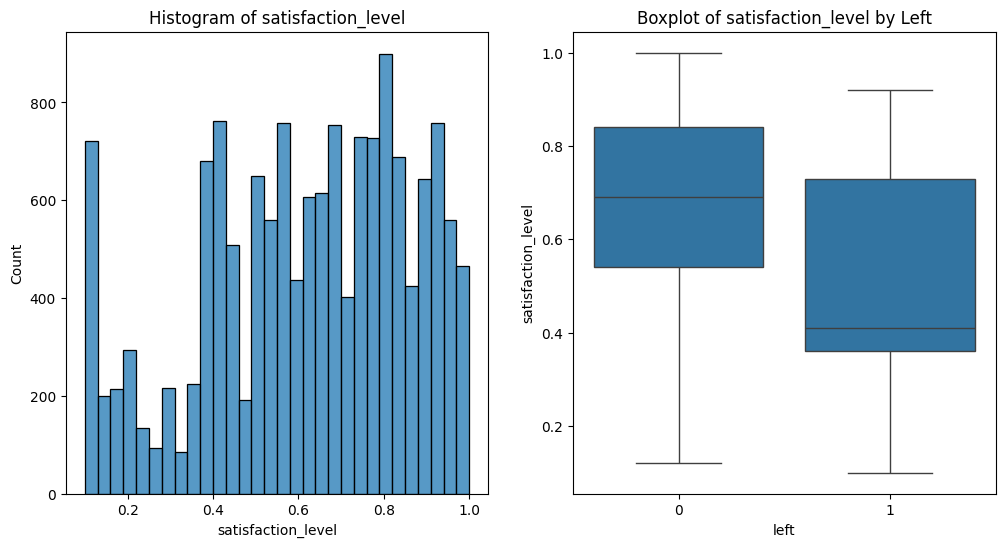

In [101]:
## primeiro vamos avaliar a distribuição e relação entre satisfaction level e "Left"
parameter = 'satisfaction_level'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num[parameter], ax = axes[0])
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

<Axes: xlabel='left', ylabel='last_evaluation'>

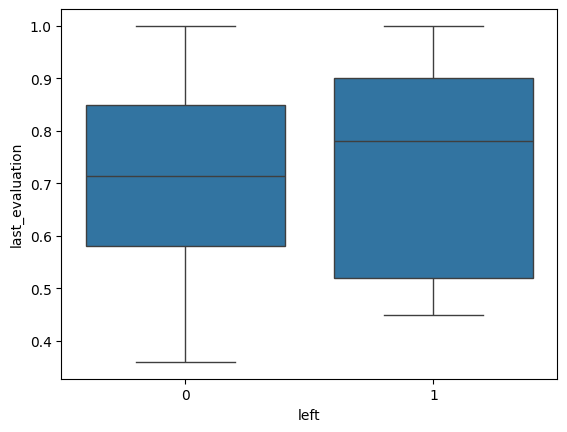

In [102]:
sb.boxplot(df_num, x='left', y = 'last_evaluation')

<Axes: xlabel='left', ylabel='average_montly_hours'>

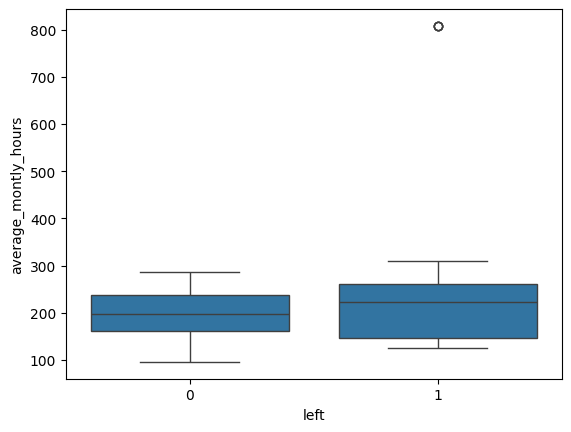

In [103]:

sb.boxplot(df_num, x='left', y = 'average_montly_hours')

<Axes: xlabel='left', ylabel='average_montly_hours'>

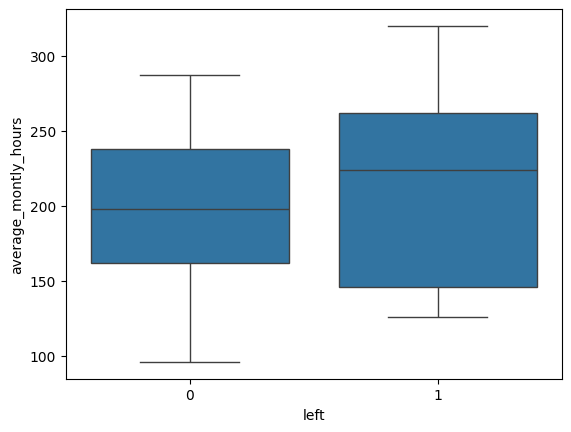

In [104]:
df_num.loc[df_num['average_montly_hours']>=320, 'average_montly_hours'] = 320
sb.boxplot(df_num, x='left', y = 'average_montly_hours')

<Axes: xlabel='left', ylabel='time_spend_company'>

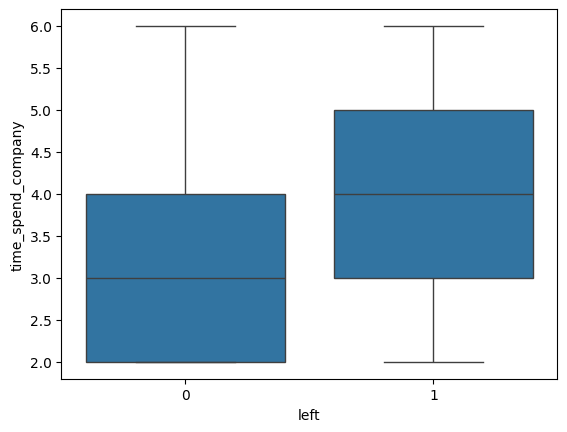

In [105]:
sb.boxplot(df_num, x='left', y = 'time_spend_company')